# __Assignment 2 - CBD3334 - Data Mining and Analysis__

## Topic: Mobile Price prediction using phone Specifications - Regression

### __Team Members__:

- 1) Aanal Patel - C0910376
- 2) Bimal Shresta - C0919385
- 3) Danilo Diaz - C0889539
- 4) Ernie Sumoso - C0881591
- 5) Jayachandhran Saravanan - C0910392

### Importing packages

- all the required packages are imported starting from the loading the dataset in the form csv till the validation of model performance and plotting the values using visualization tools

In [69]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import hvplot.pandas
import plotly.express as px
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [70]:
#creation of pandas dataframe and defining the read_csv function to load the data
df = read_csv(r'ndtv_data_final.csv')

In [71]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


### Dataset Understanding:

* Name - Name of the mobile phone 
* Brand - The Brand name of the particular mobile phone
* Model - Model name specifces the version of the particular mobile phone (eg: iphone13 has mini,pro,promax as model names)
* Battery - Defines the battey capacity in milli Amphere (hour)
* Screen size - diagnoal measurement of the screen in inches 
* Resolution x and y - are the pixel values of respective axes
* RAM - processing memory is specifiedi n MegaBytes
* Internal Storage - storage size of the phone in GigaBytes
* Rear and Front Camera - pixel capturing ability of the phone usin camera lens in MegaPixels 
* OS - The operating system of the phone 
* Number of sims - total number of sim accomodated in the phone
* processor number - total number of physical and virutal processor 
* Feature presence 
    - Bluetooh
    - WiFi
    - 3G and 4G
    - GPS
    - Touch screen
    
* Price - Target variable 

In [72]:
df.shape

(1359, 22)

In [73]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Index column

#the ananomous columns is removed 

In [74]:
df.shape

#shape of the dataset 

(1359, 21)

## Exploratory Data Analysis

#### Methods used in the following class are:

- The basicEDA method looks for preliminary data analysis like 
  - missing values
  - duplicated values 
  - numeric column summary and statistics 
  - clear information on the data_types present in the columns
- colPrice method helps in understanding the distribution of the numeric values and articulate primary idea of the data
- calculateOutliers and outliersBox methods are used to detect the extreme values present in the numeric columns
- frecount and bollvalue plots are used to list out the categorical values and also frequency chart for each unique values present in the partciular categorical columns
- corr method is utlised to check the general correaltion of numeric features present in the data

In [75]:
class EDABasic:
    def __init__(self, df, numcols, catcols):
        #constructor is used to initalize the dataframe, numeric columns and categoical columns
        self.df = df
        self.numcols = numcols
        self.catcols = catcols
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function is used for the basic EDA of data frame such as shape, statstic summary
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}\n\n'.format(shape[1]))
        
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        print('Checking the missing values:\n')
        print('Missing values:\n{}\n\n'.format(noNull))
        
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        print('Checking the Duplicate values:')
        print('Duplicate values = {}\n\n'.format(noduplicates))
        
        # statstic summary of data frame
        print('The static summary: ')
        des = self.df.describe().T.reset_index()
        des.rename({'Index': 'Stats'}, inplace=True)
        dasData = des.to_dict(orient='list')
        table = tabulate(dasData, headers='keys', tablefmt='github', numalign='right') # tabulate converts data into table format
        print(table, '\n\n')
        
        # information of the data set
        print('The information: ')
        print(self.df.info(),'\n\n')
        
    def colPrice(self):
        '''
            function: colPrice -> shows the distribution of price in against other numaric columns in data frame using line graph
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        #gathering all numerical column names into a list for easy access 
        numlist = self.numcols.columns.tolist()
        plt.figure(figsize=(5, 5))
        
        #plotting the distribution of data against price values
        for column in range(0, len(numlist)-1, 2):
            #subplots are created to have a comprised view of the distribution
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            sns.lineplot(x=self.numcols[numlist[column]], y=self.df['Price'], data=self.numcols, ax=axes[0])
            axes[0].set_title(numlist[column])

            sns.lineplot(x=self.numcols[numlist[column + 1]], y=self.df['Price'], data=self.numcols, ax=axes[1])
            axes[1].set_title(numlist[column + 1])

            plt.show()
        
    def calculateOutlires(self):
        '''
            function: calculateOutlires -> calculates the outlires in each numarical columns using IQR method
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        #essential 5 number summaries of the numeric values are calculated
        dataList = [['Name', 'q1', 'q3', 'IQR', 'Count']]
        #quantiles are measured to isolate the outliear values present in each columns
        for column in range(len(numlist)-1):
            q1 = self.numcols[numlist[column]].quantile(0.25)
            q3 = self.numcols[numlist[column]].quantile(0.75)

            IQR = q3 - q1

            lB = q1 - 1.5 * IQR
            uB = q3 + 1.5 * IQR
            dataList.append([numlist[column],q1,q3,IQR,((self.numcols[numlist[column]] < lB) | (self.numcols[numlist[column]] > uB)).sum()])
        table = tabulate(dataList, tablefmt='pretty') # tabulate converts data into table format
        print(table)
    
    def outliresBox(self):
        '''
            function: outliresBox -> shows the distribution of outlires using box plots
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #plotting boxplots with the same combination of 2-axis 
            sns.boxplot(self.numcols[numlist[column]], ax=axes[0])
            axes[0].set_title(numlist[column])
            
            sns.boxplot(self.numcols[numlist[column + 1]], ax=axes[1])
            axes[1].set_title(numlist[column + 1])
    
    def bollValuePlot(self, df):
        '''
            function: bollValuePlot -> shows the distribution of boolean features from the data set using pie charts
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        #pie-chart to visualize the binary value columns 
        fig, axes = plt.subplots(2, 3, figsize=(10,7))
        #flatten the axes to have side-side view
        axes = axes.flatten()
        #color palettes for the different binary values
        palettes = ['pastel', 'deep', 'bright', 'muted', 'colorblind', 'viridis']
        font_size = 15
        title_font = 20
        
        for i, (columnNmae, ax) in enumerate(zip(df.columns, axes)):
            size = df[columnNmae].value_counts()
            palette = sns.color_palette(palettes[i])
            ax.pie(size, labels=size.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': font_size})
            ax.set_title(columnNmae, fontsize=title_font)
            
        plt.tight_layout()
        plt.show()
        
    def FreCount(self, col, figsize_, dispercent):
        '''
            function: FreCount -> counts the percentage of catagorical columns and show the distribution using bar plots
            arg: col (pandas.core.series.Series) -> column of the data set
                 figsize_ (tuple) -> size of the graph
                 dispercent (boolean) -> 1: display the percentage of the distribution
                                         0: does not display the percentage of the distribution
            return: None
        '''
        df_brand = col.value_counts() 
        #calculating the percentage of the unique values frequency
        percent = round((df_brand * 100) / self.df.shape[0], 2)
        
        plt.figure(figsize=figsize_)
        ax = sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xlabel(col.name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        if dispercent:
            for i, value in enumerate(percent):
                plt.text(i, value, str(value), ha='center', va='bottom')
        plt.show()
        
    def corr(self):
        '''
            function: corr -> Represent the correlation of each numaric column using heat map
            arg: None
            return: None
        '''
        #using pearson correlation to plot the numeric value contributions 
        coff = self.df.corr(method='pearson', numeric_only=True)
        plt.figure(figsize=(12,10))
        sns.heatmap(data=coff, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='black')
        plt.show()

## defining numeric and categorical columns globally

- Name column is dropped as it is not giving any significance to the prediction on analysis

In [76]:
numcols = df.select_dtypes(include='number') # numeric column data set
catCols = df.select_dtypes(exclude='number') # catagorical column data set
catCols.drop(columns=['Name'], inplace=True) 

C:\Users\bhair\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
numcols.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


In [78]:
print('BASIC EDA\n')
eda = EDABasic(df, numcols, catCols) # creating a class instance

BASIC EDA

SHAPE OF DATAFRAME:
Columns = 1359
Rows = 21


Checking the missing values:

Missing values:
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


Checking the Duplicate values:
Duplicate values = No Duplicat values


The static summary: 
| index                  |   count |    mean |      std |   min |    25% |   50% |   75% |    max |
|------------------------|---------|---------|----------|-------|--------|-------|-------|--------|
|

<Figure size 500x500 with 0 Axes>

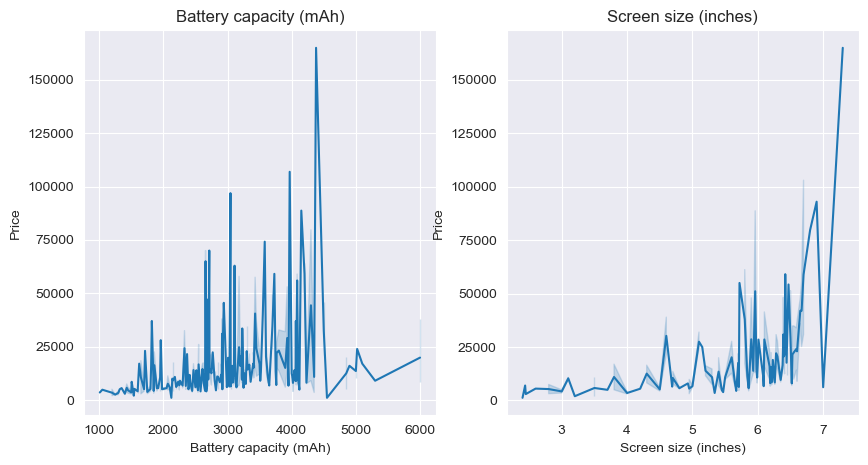

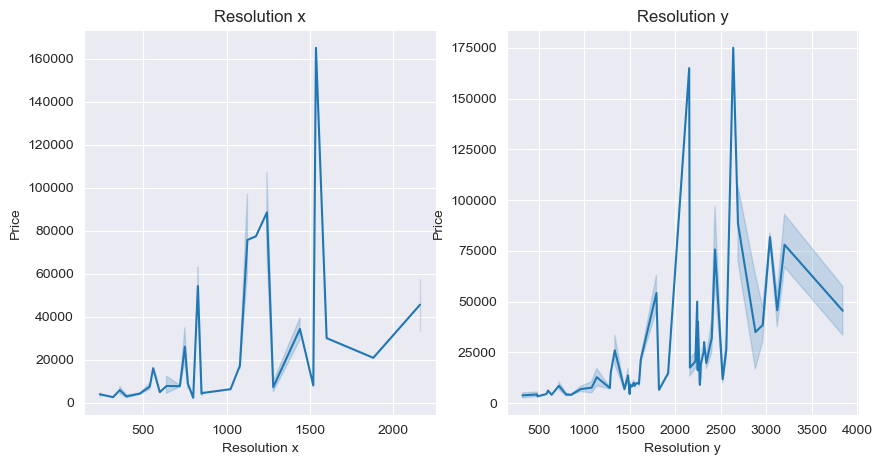

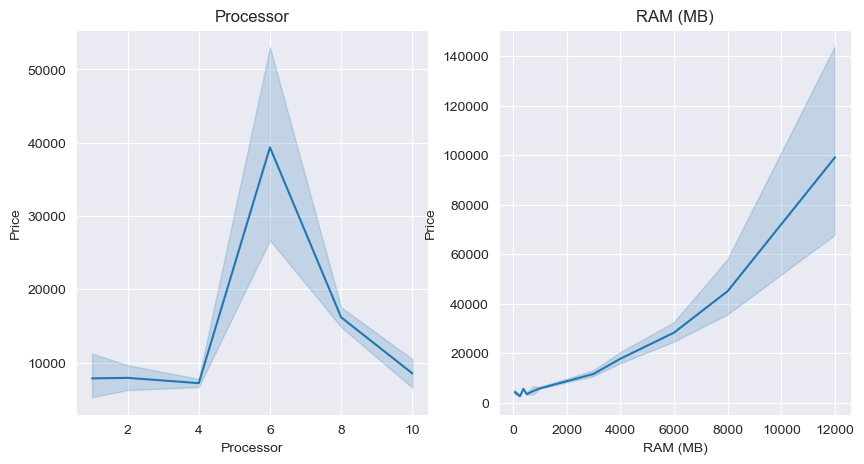

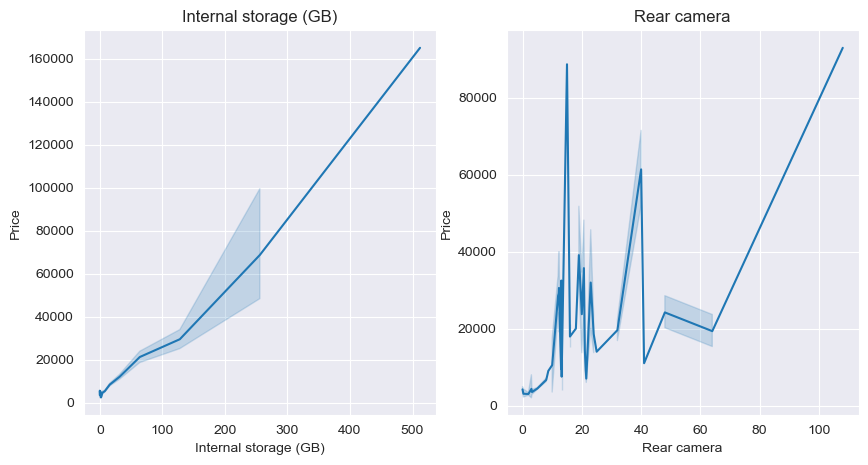

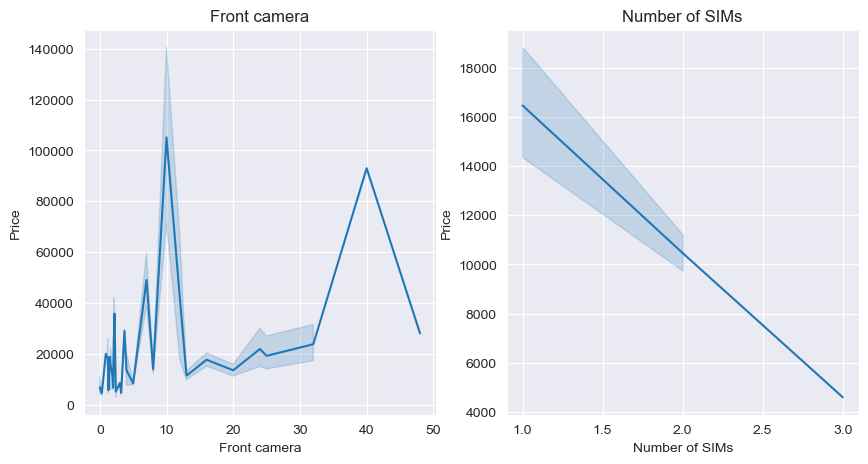

In [79]:
eda.colPrice()  #creating a method instance to plot the distrubtion of numeric values

In [80]:
eda.calculateOutlires() #creating 5 number statistical summeries and the count values
eda.outliresBox() #plotting the boxplot

+------------------------+--------+--------+--------------------+-------+
|          Name          |   q1   |   q3   |        IQR         | Count |
| Battery capacity (mAh) | 2300.0 | 3500.0 |       1200.0       |   3   |
|  Screen size (inches)  |  5.0   |  5.7   | 0.7000000000000002 |  22   |
|      Resolution x      | 720.0  | 1080.0 |       360.0        |   3   |
|      Resolution y      | 1280.0 | 1920.0 |       640.0        |  21   |
|       Processor        |  4.0   |  8.0   |        4.0         |   0   |
|        RAM (MB)        | 1000.0 | 3000.0 |       2000.0       |  33   |
| Internal storage (GB)  |  8.0   |  32.0  |        24.0        |  79   |
|      Rear camera       |  8.0   |  13.0  |        5.0         |  91   |
|      Front camera      |  2.0   |  8.0   |        6.0         |  79   |
|     Number of SIMs     |  2.0   |  2.0   |        0.0         |  228  |
+------------------------+--------+--------+--------------------+-------+


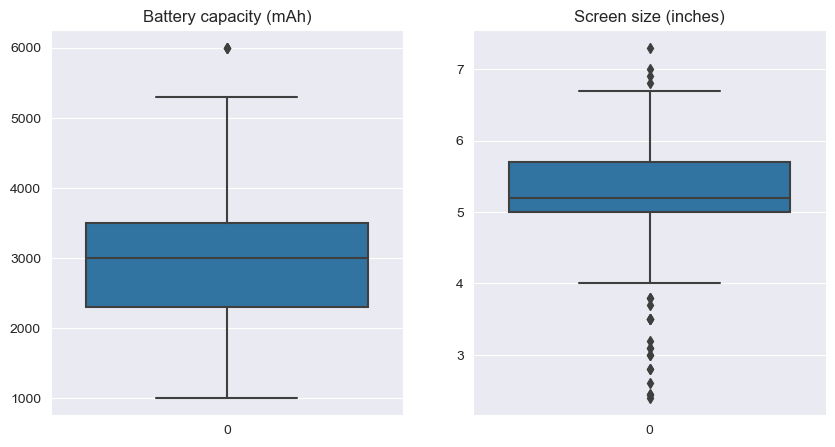

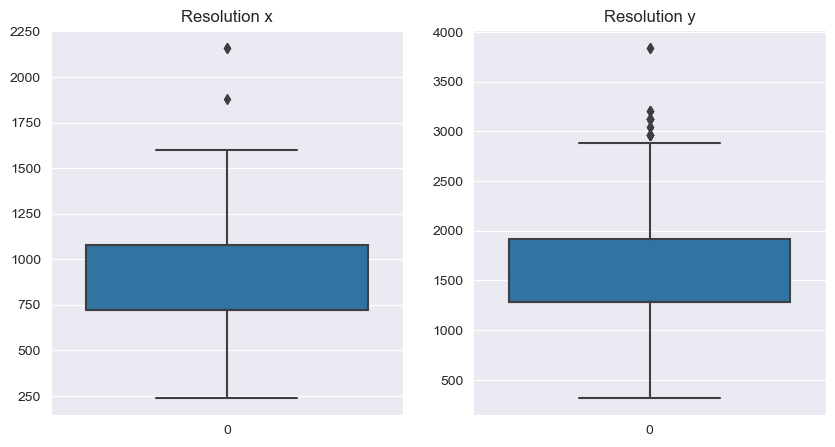

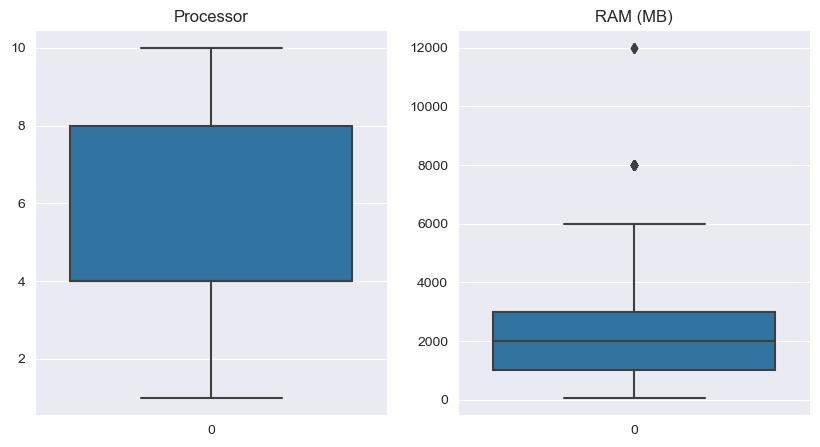

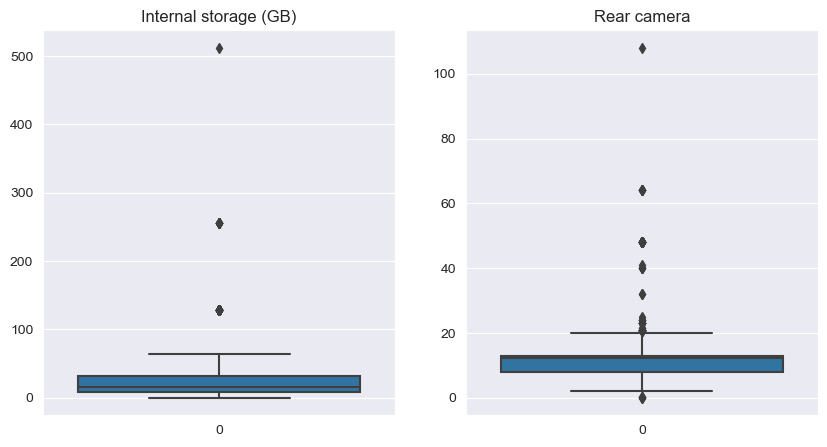

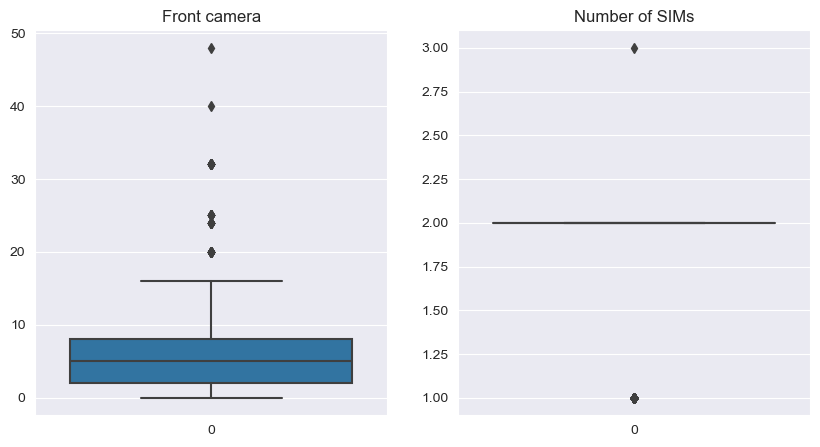

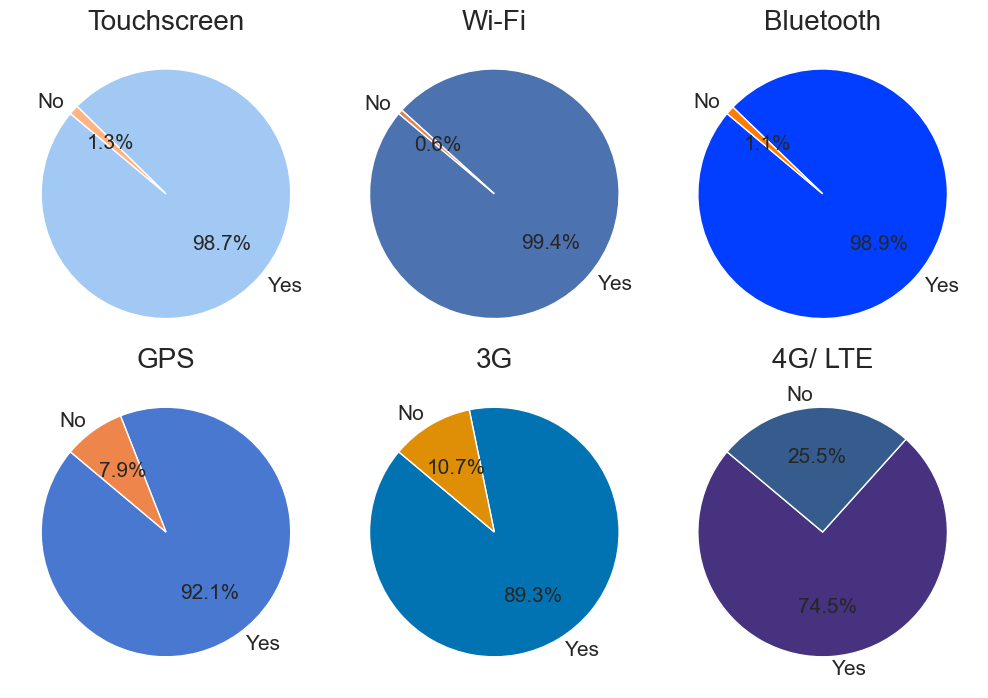

In [81]:
eda.bollValuePlot(catCols.drop(columns=['Brand', 'Model', 'Operating system'])) #ignoring the categorical values 

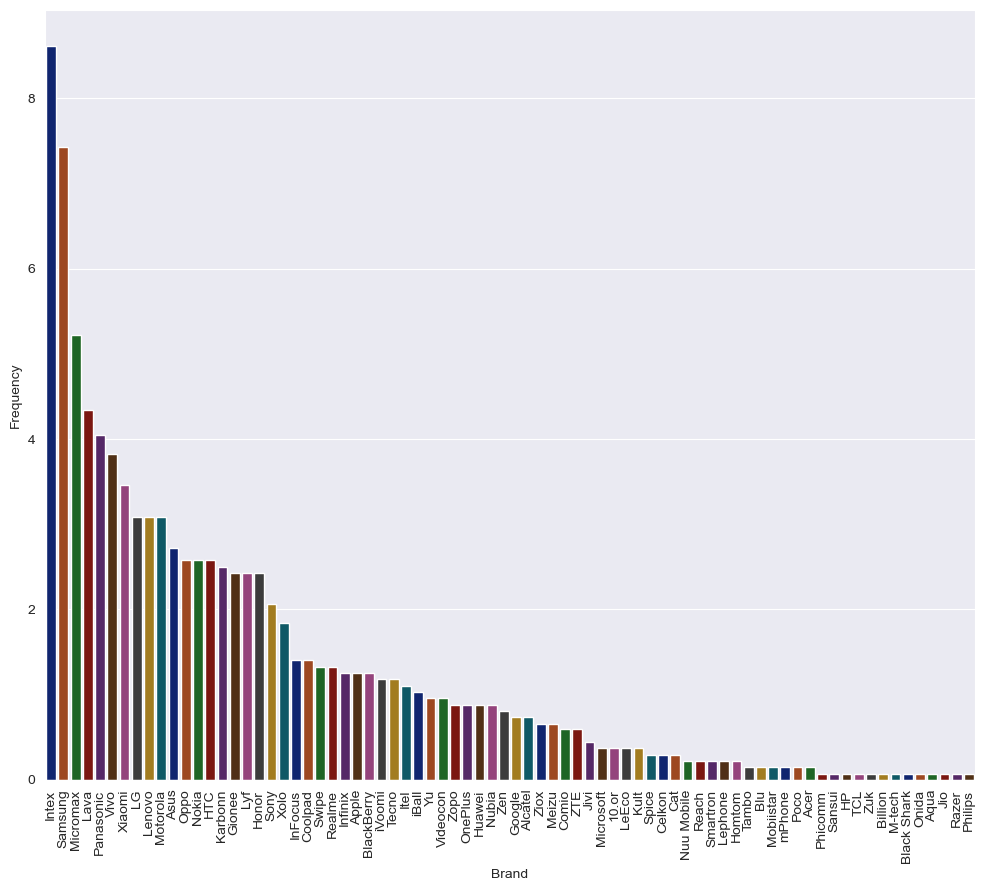

In [82]:
eda.FreCount(df['Brand'], (12, 10), 0) #frequency plot on the Brand name of the mobile phones 

In [83]:
df.head(2)

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999


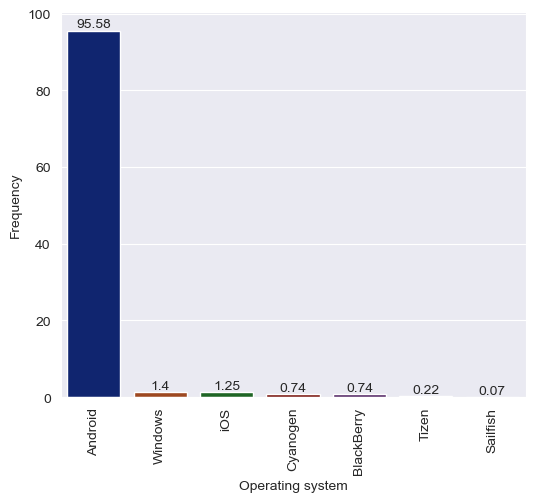

In [84]:
eda.FreCount(df['Operating system'], (6,5), 1) #frequency plot on the operating systems of the mobile phones 

### correlation heatmap

In [85]:
# eda.corr()

In [86]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [87]:
numeric_columns_=numcols.columns.tolist()

In [88]:
numeric_columns_

['Battery capacity (mAh)',
 'Screen size (inches)',
 'Resolution x',
 'Resolution y',
 'Processor',
 'RAM (MB)',
 'Internal storage (GB)',
 'Rear camera',
 'Front camera',
 'Number of SIMs',
 'Price']

In [89]:
categorical_columns_=catCols.columns.tolist()

In [90]:
categorical_columns_

['Brand',
 'Model',
 'Touchscreen',
 'Operating system',
 'Wi-Fi',
 'Bluetooth',
 'GPS',
 '3G',
 '4G/ LTE']

### validation of the categorical and numerical columns present in the data

- the value true authenticate the different datatype columns 

In [91]:
len(df.drop(columns='Name').columns.tolist())==len(numeric_columns_)+len(categorical_columns_)

True

## Pre-processing and feature analysis

In [92]:
class col_analyser:
    def __init__(self,data):
        """
        arg: dataframe to be processed for analysising the numeric and categorical columns

        function: class_constructor

        return: None
        """
        #initialising the dataframe for the following methods in the class
        self.df=data
        
    def categorical_analyze(self):
        """
        arg: None

        function: detailed analysis (unique value and its count) of categorical columns present in the dataframe 

        return: dataframe describing each categorical variable characteristic --> used to transform for pre-processing 
        """
        #creating temp_categorical column name list 
        self.categorical_columns=self.df.select_dtypes(include=['object']).columns.tolist()
        
        cat_tab=[]
        for i in self.categorical_columns:
            #loading the number of unique values present 
            unique_element_counts=self.df[i].nunique()
            #(distinct)unique values 
            unique_elements=self.df[i].unique()
            cat_tab.append({'cat_column_name':i,'unique_value_counts':unique_element_counts,'unique_values':unique_elements})
        return pd.DataFrame(cat_tab)
    
    
    def numerical_analyze(self):
        """
        arg: None

        function: Visualizing the distribution and QQ plots to apply standradization on top of the numeric values before training

        return: None
        
        call: initiate the validation method 
        """
        self.numerical_columns=self.df.select_dtypes(include='number').columns.tolist()
         #creating temp_numerical column name list 
        for i in self.numerical_columns:
            unique_element_counts=self.df[i].nunique()
            sns.set_style('darkgrid')
            fig,axs=plt.subplots(1,2,figsize=(14,6))
            sns.histplot(df[i],ax=axs[1])
            stats.probplot(df[i],plot=axs[0],fit=True)
            #using prob_plot to analyse the theoratical distribution values with the actual values
            axs[0].set_title('QQ_plot')
            axs[1].set_title('distribution')
            #comparing the distribution plot
            fig.suptitle("numerical column analysis - {}".format(i))
            plt.tight_layout()
            plt.show()
        self.validation_()
        
      
    def validation_(self):

        """
        arg: None

        function: overall numeric and categorical columns post analysis

        return: None
        """
        print("Categorical columns are :{}".format(self.categorical_columns))
        print("numerical columns are :{}".format(self.numerical_columns))

    def correlation_with_target(self,df,target):

        """
        arg: dataframe on which correlation need to be applied
        arg: target column to calculate the correlation 

        function: correlation analysis (numeric values with respect to target variable)

        return: correlation values in descending (importance) order
        """
        #target variable based correlation analysis on the numeric columns present 
        return(df.corr()[target].round(3).sort_values(ascending=False))
    
    def possible_high_correlation(self,df):


        """
        arg: dataframe

        function: identifying features of high correlation

        return:  columns which are having possiblity of correlations
        """
        #reanalysing the correaltion done prior to check the multi-collinear data present 
        correlation_=df.corr()
        unique_columns_with_high_correlations=set()
        for i in range(len(correlation_.columns)):
            for j in range(i):
                #setting our threshold to 0.6 (60%) of correaltion to be allowed
                if abs(correlation_.iloc[i,j])>0.6:
                    suspect_column=correlation_.columns[i]
                    unique_columns_with_high_correlations.add(suspect_column)
        return(unique_columns_with_high_correlations)
        

In [93]:
feature_analyze=col_analyser(df) #creating the class instance for the col_analyser

In [94]:
feature_analyze.categorical_analyze() #analysing of the unique values and its counts (categorical values )

,cat_column_name,unique_value_counts,unique_values
0,Name,1359,"[OnePlus 7T Pro McLaren Edition, Realme X2 Pro, iPhone 11 Pro Max, iPhone 11, LG G8X ThinQ, OnePlus 7T, OnePlus 7T Pro, Samsung Galaxy Note 10+, Asus ROG Phone 2, Xiaomi Redmi K20 Pro, Oppo K3, Realme X, Xiaomi Redmi K20, OnePlus 7 Pro, Oppo Reno 10x Zoom, Realme 3 Pro, Huawei P30 Pro, Redmi Note 7 Pro, Huawei Mate 20 Pro, LG V40 ThinQ, OnePlus 6T, Apple iPhone XR, Apple iPhone XS Max, Apple iPhone XS, Google Pixel 3 XL, Google Pixel 3, Asus ROG Phone, Samsung Galaxy Note 9, LG G7+ ThinQ, Asus ZenFone Max Pro M1, Huawei P20 Pro, OnePlus 6, Asus ZenFone 5Z (ZS620KL), Redmi Note 5 Pro, Nokia 7 Plus, Samsung Galaxy S9+, Samsung Galaxy S9, HTC U11+, Samsung Galaxy Note 8, Apple iPhone 8, Apple iPhone 8 Plus, Apple iPhone X, Motorola Moto Z2 Force, HTC U11, Nokia 8, Samsung Galaxy S8+, Samsung Galaxy S8, LG G6, OnePlus 3T, Samsung Galaxy C9 Pro, Google Pixel XL, Apple iPhone 7 Plus, Apple iPhone 7, Honor 8, OnePlus 3, Asus ZenFone 3 Deluxe (ZS570KL), Xiaomi Mi 5, Samsung Galaxy S7 Edge, Samsung Galaxy S7, Motorola Moto X Force, Google Nexus 6P, Apple iPhone 6s Plus, Yu Yureka Plus, Samsung Galaxy A8, Samsung Galaxy S6, Yu Yureka, Xiaomi Redmi Note, Realme C3, Poco X2, Samsung Galaxy S10 Lite, Realme 5i, Samsung Galaxy Note 10 Lite, Vivo V17, Vivo U20, Realme 5s, Realme X2, Vivo V17 Pro, Nubia Red Magic 3S, Samsung Galaxy M30s, Vivo Z1x, Oppo Reno 2Z, Realme XT, Redmi Note 8 Pro, Nokia 7.2, Samsung Galaxy A50s, Realme 5 Pro, Realme 5, Vivo Z1 Pro, Xiaomi Mi A3, Asus 6Z, Samsung Galaxy M40, Redmi Note 7S, Motorola One Vision, Nubia Red Magic 3, Oppo A9, Google Pixel 3a XL, Samsung Galaxy A70, Black Shark 2, OnePlus 7, LG G8s ThinQ, ...]"
1,Brand,76,"[OnePlus, Realme, Apple, LG, Samsung, Asus, Xiaomi, Oppo, Huawei, Google, Nokia, HTC, Motorola, Honor, Yu, Poco, Vivo, Nubia, Black Shark, Infinix, Lenovo, Sony, Jio, Coolpad, Micromax, Smartron, LeEco, BlackBerry, Gionee, Meizu, Panasonic, Tecno, InFocus, Itel, 10.or, Lava, Cat, Lyf, Intex, Xolo, Acer, Phicomm, Karbonn, Spice, iVoomi, Kult, Nuu Mobile, Ziox, Zopo, ZTE, Onida, Microsoft, iBall, Mobiistar, Comio, Videocon, Alcatel, Reach, Zen, Tambo, Razer, Homtom, Lephone, Aqua, Celkon, Jivi, Billion, Swipe, M-tech, Sansui, Zuk, TCL, mPhone, Blu, HP, Philips]"
2,Model,1321,"[7T Pro McLaren Edition, X2 Pro, iPhone 11 Pro Max, iPhone 11, G8X ThinQ, 7T, 7T Pro, Galaxy Note 10+, ROG Phone 2, Redmi K20 Pro, K3, X, Redmi K20, 7 Pro, Reno 10x Zoom, 3 Pro, P30 Pro, Redmi Note 7 Pro, Mate 20 Pro, V40 ThinQ, 6T, iPhone XR, iPhone XS Max, iPhone XS, Pixel 3 XL, Pixel 3, ROG Phone, Galaxy Note 9, G7+ ThinQ, ZenFone Max Pro M1, P20 Pro, 6, ZenFone 5Z (ZS620KL), Redmi Note 5 Pro, 7 Plus, Galaxy S9+, Galaxy S9, U11+, Galaxy Note 8, iPhone 8, iPhone 8 Plus, iPhone X, Moto Z2 Force, U11, 8, Galaxy S8+, Galaxy S8, G6, 3T, Galaxy C9 Pro, Pixel XL, iPhone 7 Plus, iPhone 7, 3, ZenFone 3 Deluxe (ZS570KL), Mi 5, Galaxy S7 Edge, Galaxy S7, Moto X Force, Google Nexus 6P, iPhone 6s Plus, reka Plus, Galaxy A8, Galaxy S6, reka, Redmi Note, C3, X2, Galaxy S10 Lite, 5i, Galaxy Note 10 Lite, V17, U20, 5s, V17 Pro, Red Magic 3S, Galaxy M30s, Z1x, Reno 2Z, XT, Redmi Note 8 Pro, 7.2, Galaxy A50s, 5 Pro, 5, Z1 Pro, Mi A3, 6Z, Galaxy M40, Redmi Note 7S, One Vision, Red Magic 3, A9, Pixel 3a XL, Galaxy A70, 2, 7, G8s ThinQ, V15 Pro, Redmi Note 7, ...]"
3,Touchscreen,2,"[Yes, No]"
4,Operating system,7,"[Android, iOS, Cyanogen, BlackBerry, Windows, Tizen, Sailfish]"
5,Wi-Fi,2,"[Yes, No]"
6,Bluetooth,2,"[Yes, No]"
7,GPS,2,"[Yes, No]"
8,3G,2,"[Yes, No]"
9,4G/ LTE,2,"[Yes, No]"


### QQ_plot  and distribution map

- along with the boxplot analysis before we created qq_plot to check the numeric values 
- the distribution and the prob_plots are displayed to do compartive analysis on the projected theoratical values and the actual values
- the discreate set of values will be ignored as it is obvious 

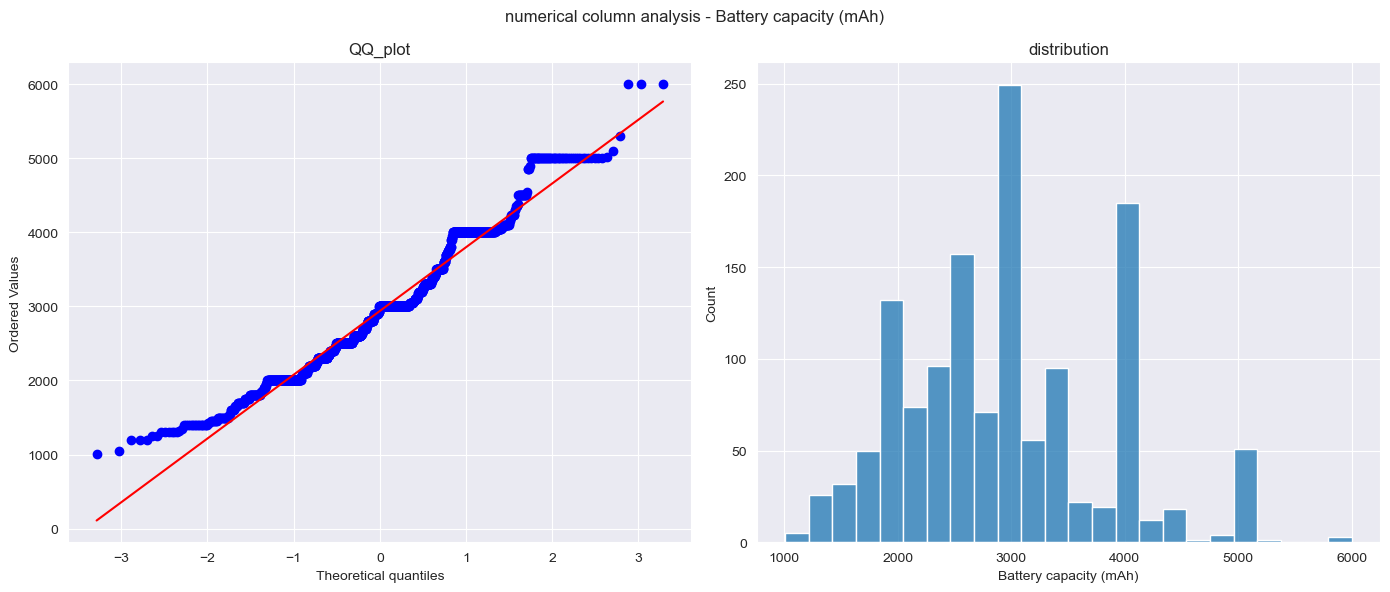

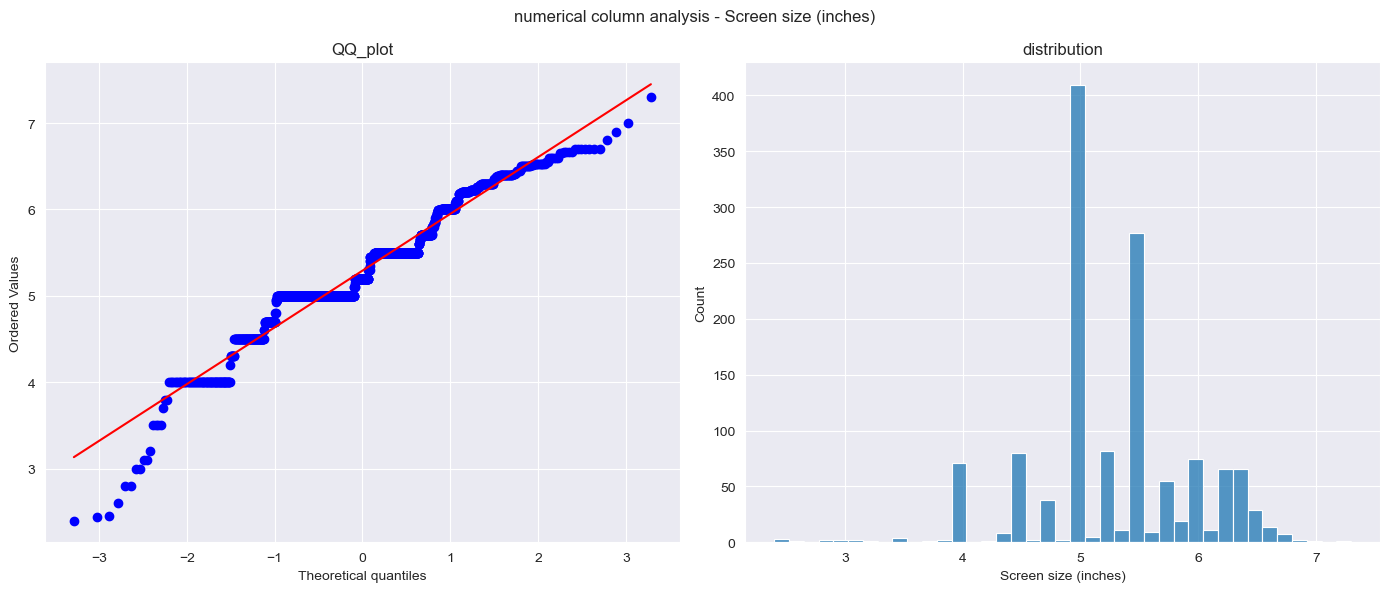

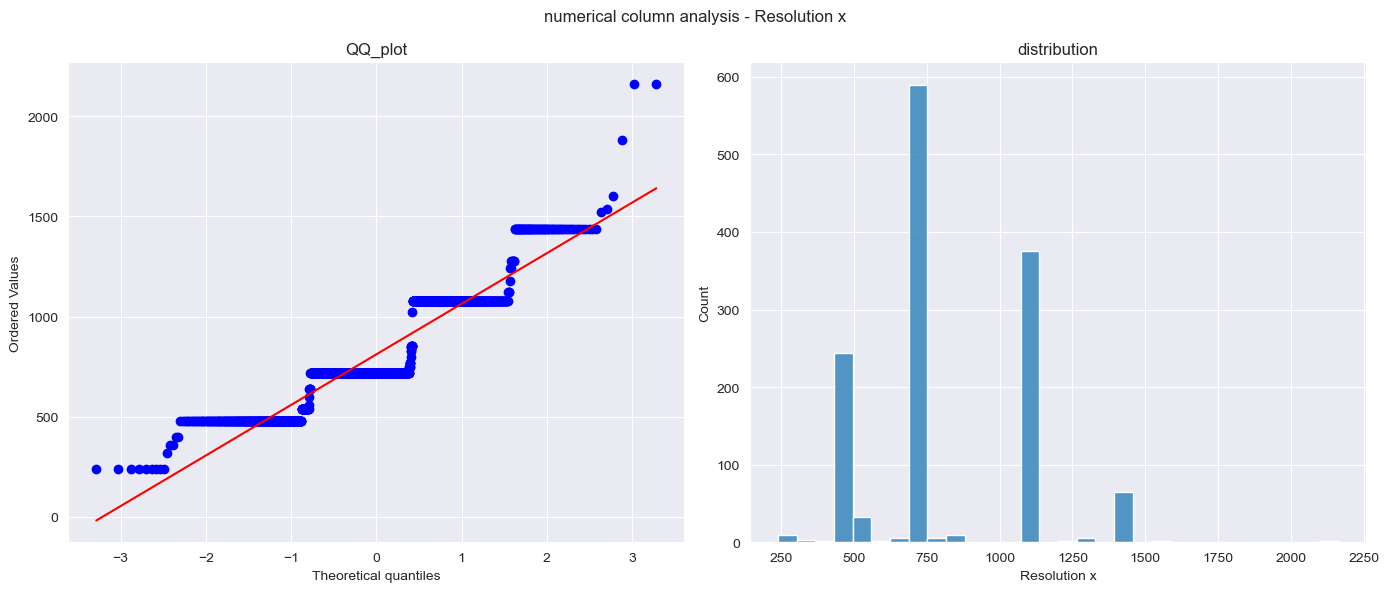

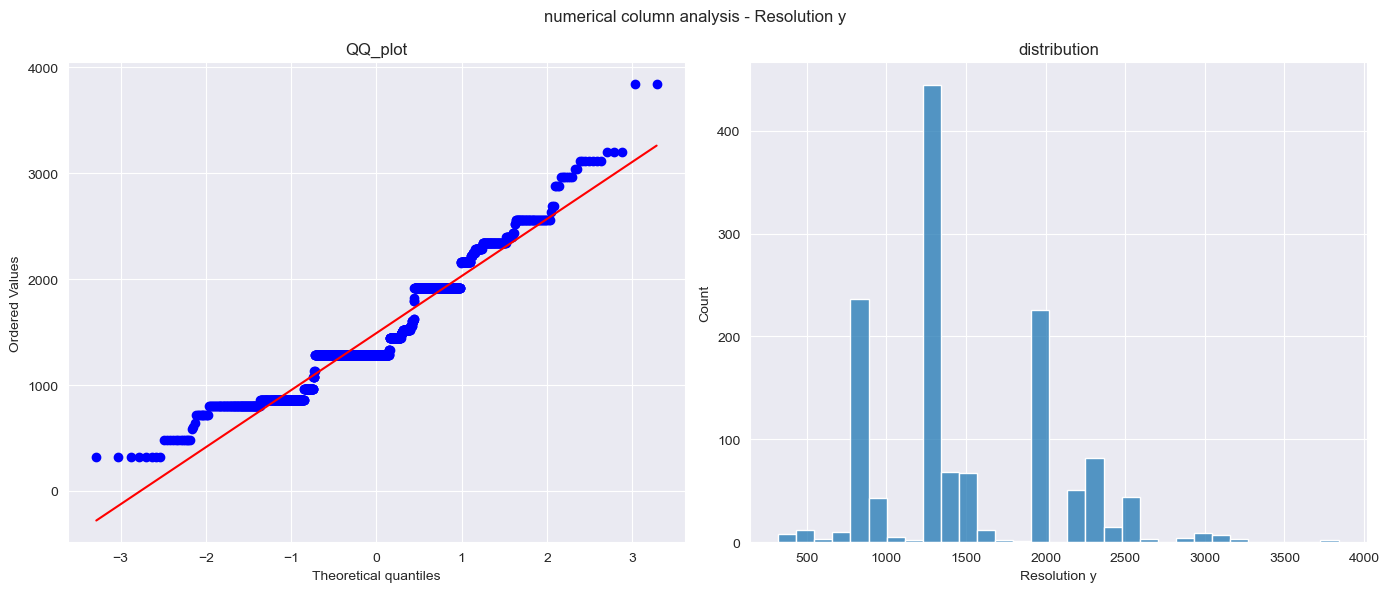

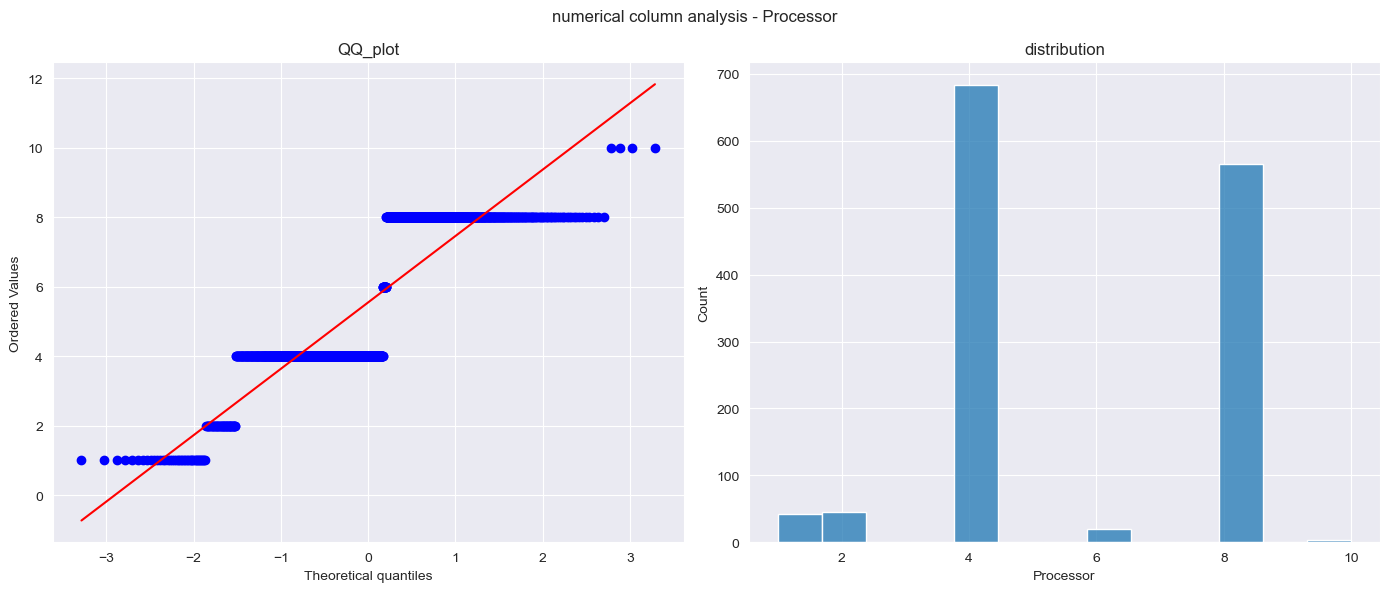

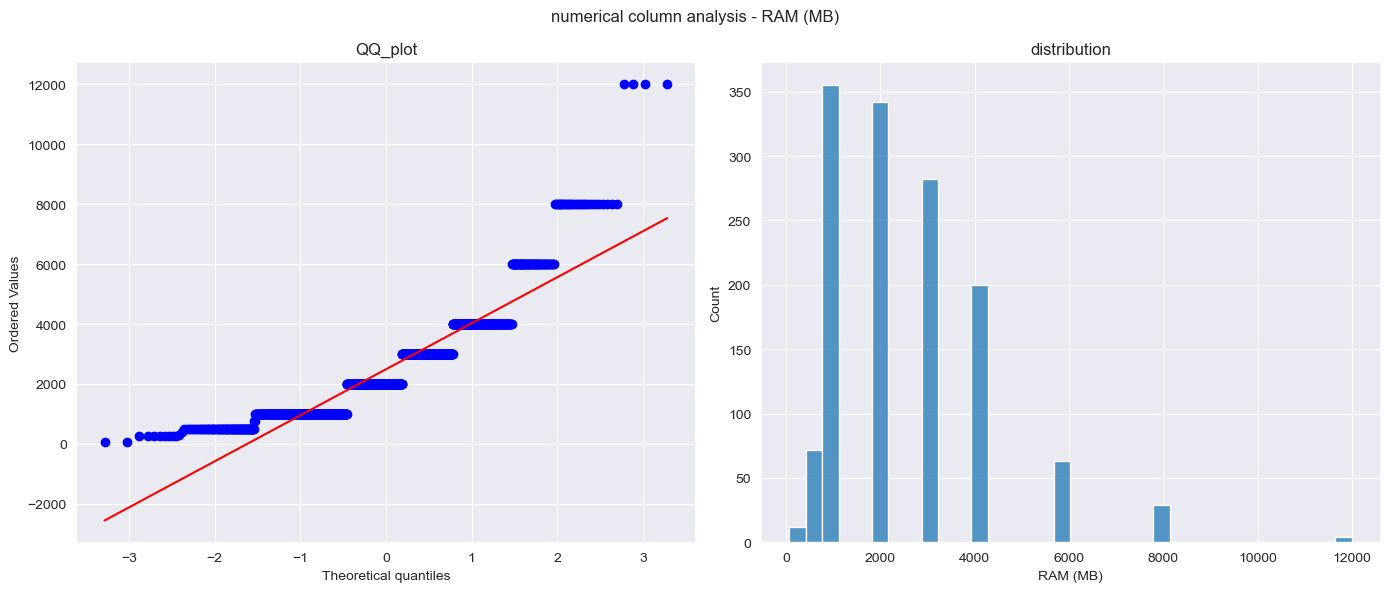

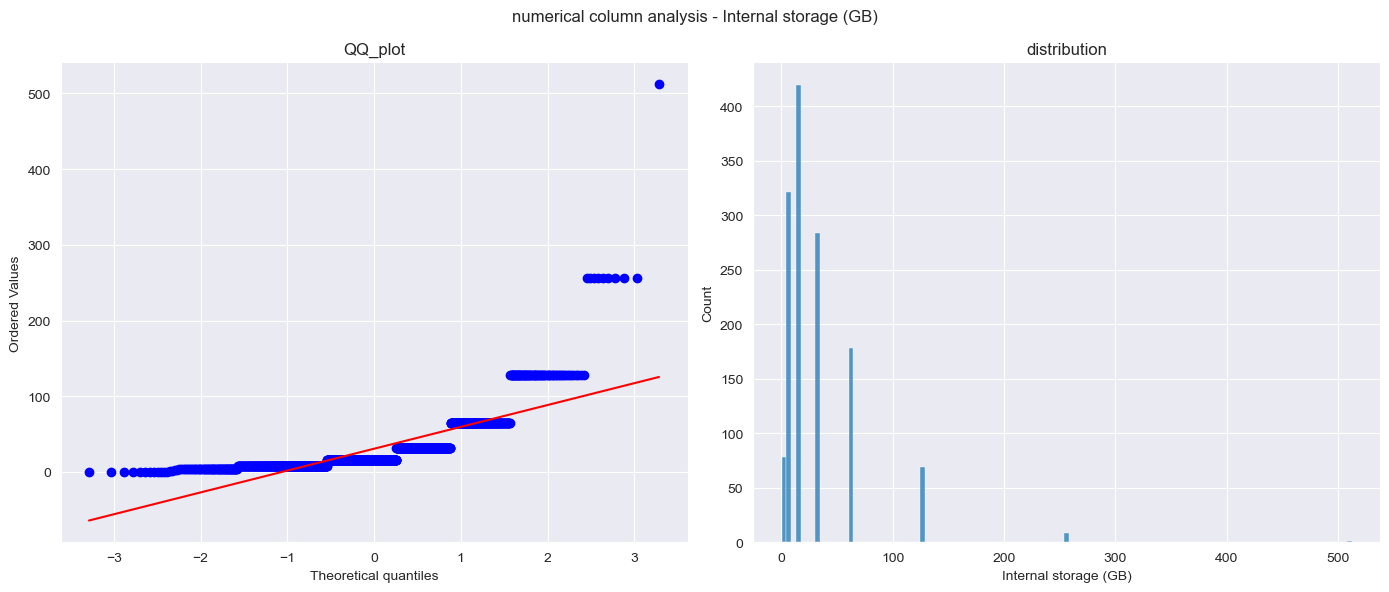

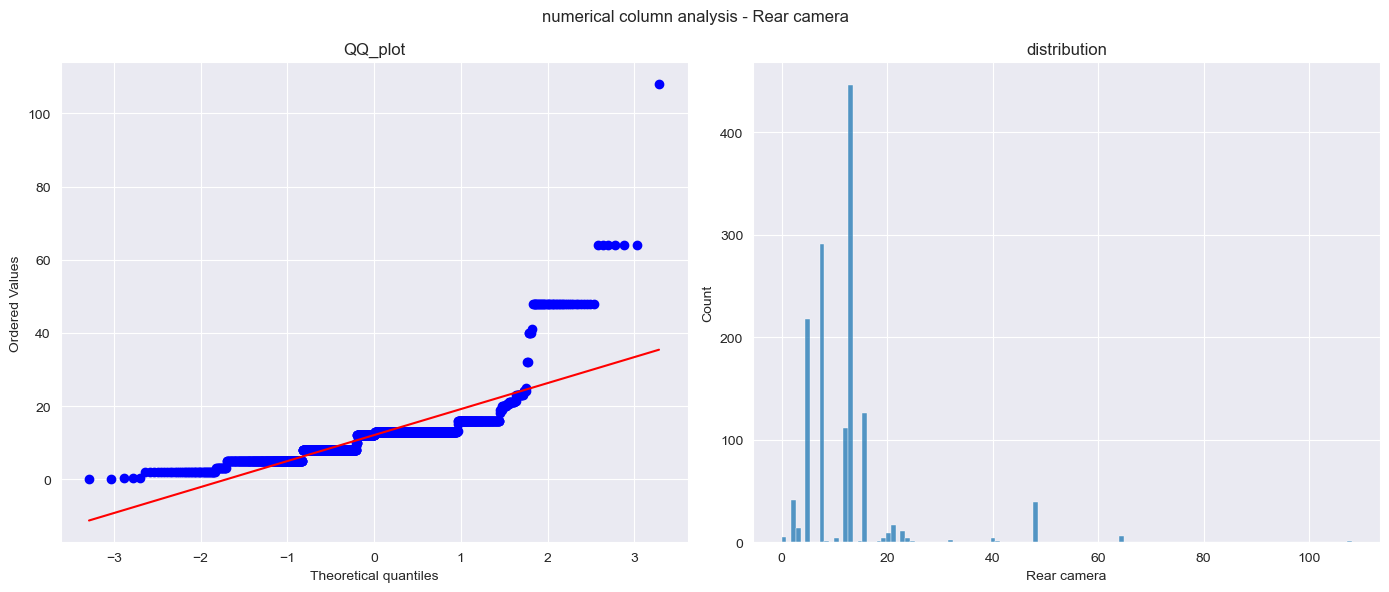

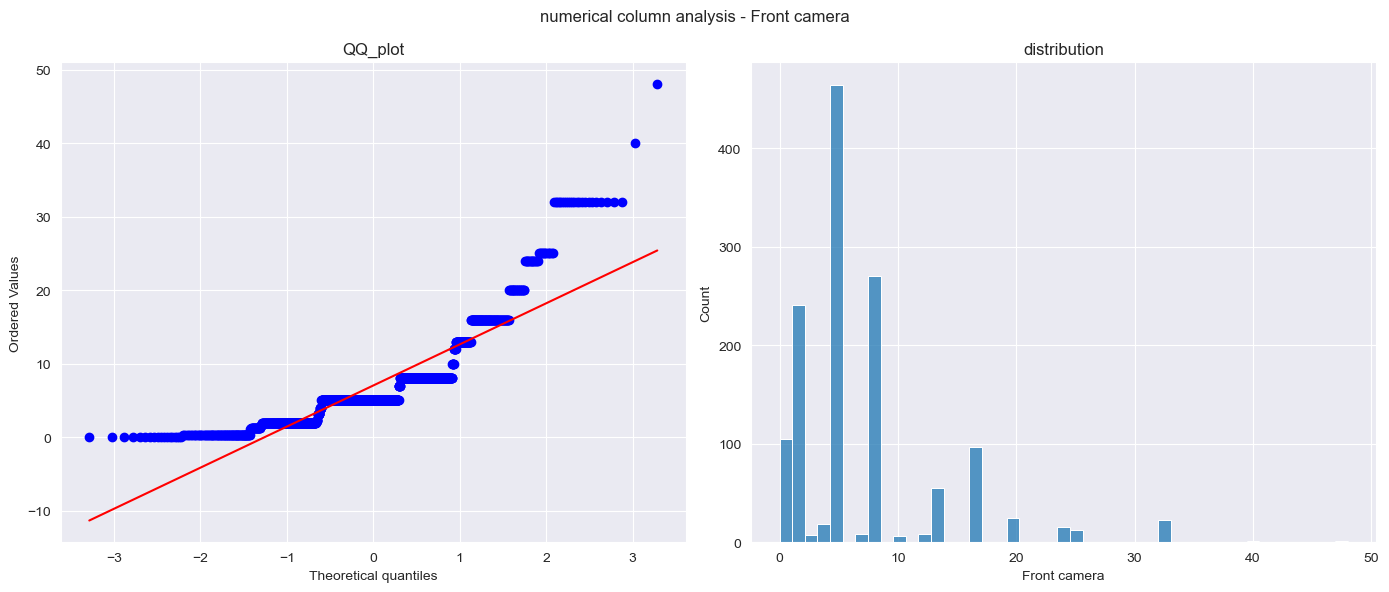

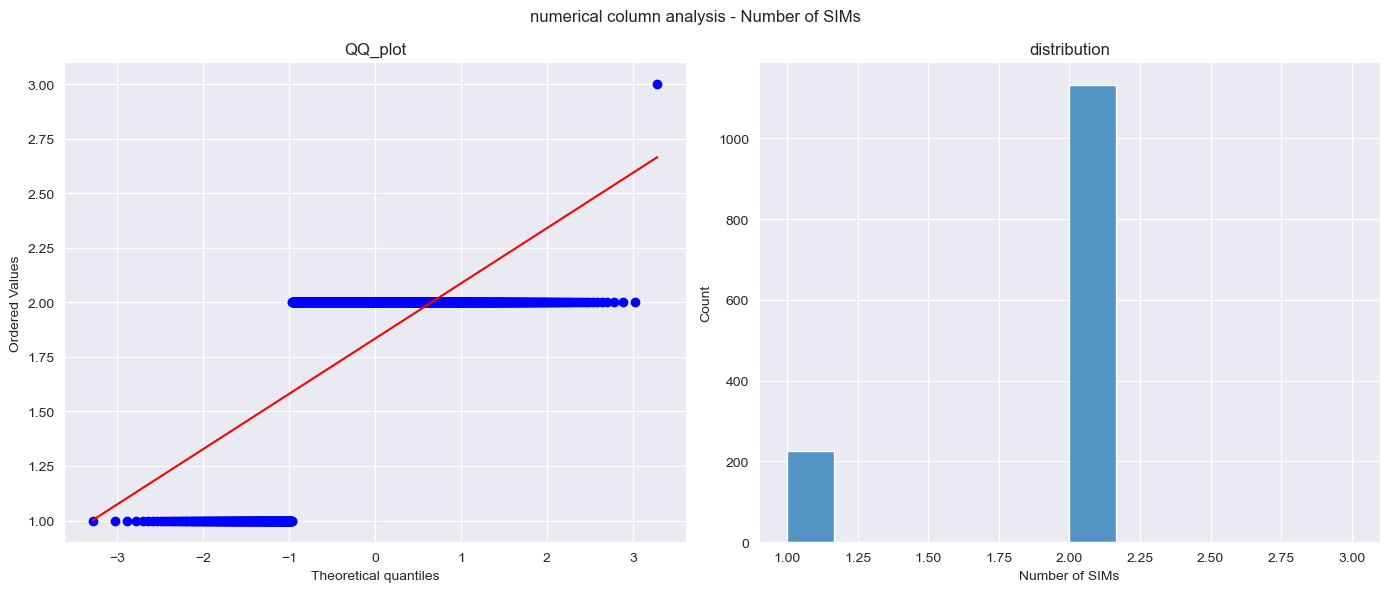

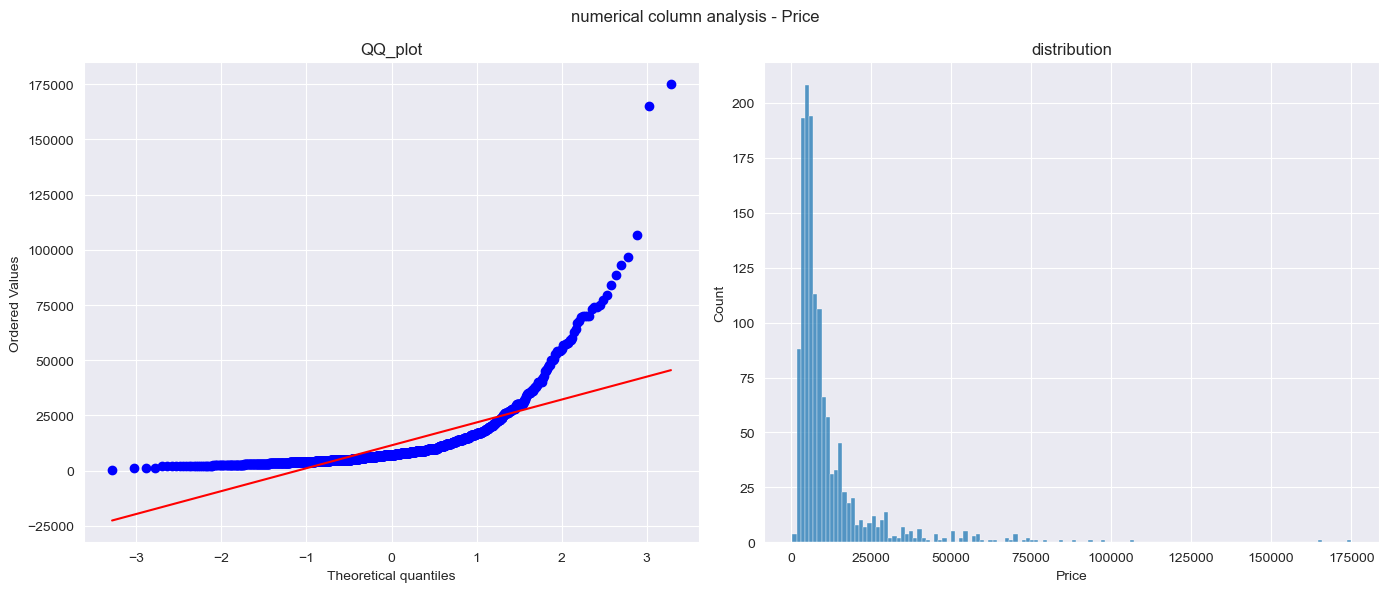

Categorical columns are :['Name', 'Brand', 'Model', 'Touchscreen', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
numerical columns are :['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Number of SIMs', 'Price']


In [95]:
feature_analyze.numerical_analyze()

In [96]:
feature_analyze.correlation_with_target(numcols,'Price') #TARGET VARIABLE CORREALTION

Price                     1.000
Internal storage (GB)     0.644
RAM (MB)                  0.613
Resolution y              0.576
Resolution x              0.541
Screen size (inches)      0.402
Rear camera               0.379
Front camera              0.311
Processor                 0.302
Battery capacity (mAh)    0.298
Number of SIMs           -0.162
Name: Price, dtype: float64

In [97]:
feature_analyze.possible_high_correlation(numcols)  #columns possessing high correlation among themselves

{'Front camera',
 'Internal storage (GB)',
 'Price',
 'Processor',
 'RAM (MB)',
 'Rear camera',
 'Resolution y',
 'Screen size (inches)'}

## model_pre processing

- the outliers are handled using various method using experimentation (trail/error)
- log_transformation is used on the target and numeric columns to address the outliers 
- visual comparision of the transformed columns are carried to verify the applied log_transformation
- label encoding is used for the converting the categorical features to near numeric representation  

In [98]:
class preProcessing:
    def __init__(self, df):
        #initialising the dataframe(numeric) to be used in this class methods
        self.df = df
        
    def outlireHandeling(self, col):
        '''
            function: outlireHandeling -> Performs the log transformation on the columnn
            arg: col (pandas.core.series.Series) -> column of the data set
            return: 'This column does not exsist in data set' (str) -> if the column does not exsist
        '''
        if col not in self.df.columns.tolist():
            return 'This column does not exsist in data set'
        #applying lograthemic transformation on the target variable
        self.df['logTranforedPrice'] = round(np.log10(df[col] + 1),2)
        
    def log_tranformation(self,df):
        
        """
        arg: dataframe(numeric_columns_only)

        function: applying lograthemic transformation on all the numeric columns 

        return: None
        
        """
        for col in df:
            #using lambda to apply log on each rows of the numeric valies 
            self.df[col]=self.df[col].map(lambda i: np.log10(i) if i>0 else 0)
        
    def comparisionofResults(self, col1, col2):
        '''
            function: comparisionofResults -> shows the visual comaparision of two columns in two bar graph
            arg: col1 (pandas.core.series.Series) -> column of the data set
                 col2 (pandas.core.series.Series) -> column of the data set
            return: None
        '''
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        plt.suptitle('Comparision of original price v/s log transformation', fontsize=20)
        sns.histplot(ax=axes[0], x=self.df['Price'], bins=70, kde=True, color=(0.95, 0.1, 0.85))
        axes[0].set_xlabel('Price', fontsize=15)
        axes[0].set_ylabel('Frequency', fontsize=15)
        sns.histplot(ax=axes[1], x=self.df['logTranforedPrice'], bins=50, kde=True, color=(0.2, 0.85, 0.95))
        axes[1].set_xlabel('Log Transformed Price', fontsize=15)
        axes[1].set_ylabel('Frequency', fontsize=15)
        plt.show()
        
    def labelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (pandas.core.indexes.base.Index) -> index of the columns 
            return: None
        '''
        #initalizing tthe labelencoder method
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

In [99]:
preprocess = preProcessing(df) #creating instance of the class preprocessing 

In [100]:
preprocess.log_tranformation(numcols.drop(columns='Price')) #calling the class_method to apply log_transform

In [101]:
preprocess.outlireHandeling('Price')

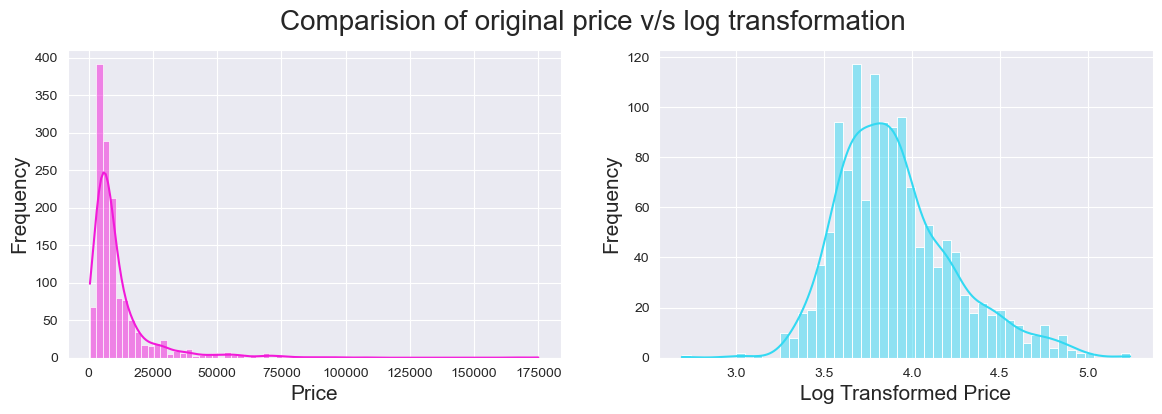

In [102]:
preprocess.comparisionofResults('Price', 'logTranforedPrice')

In [103]:
preprocess.labelEncoding(catCols.drop(columns=['Brand']).columns) #label encoding of all the categorical columns

In [104]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,logTranforedPrice
0,OnePlus 7T Pro McLaren Edition,OnePlus,49,3.611192,0.824126,1,3.158362,3.494155,0.903090,4.079181,...,1.204120,0,1,1,1,0.30103,1,1,58998,4.77
1,Realme X2 Pro,Realme,1142,3.602060,0.812913,1,3.033424,3.380211,0.903090,3.778151,...,1.204120,0,1,1,1,0.30103,1,1,27999,4.45
2,iPhone 11 Pro Max,Apple,1288,3.598681,0.812913,1,3.094122,3.429429,0.778151,3.602060,...,1.079181,6,1,1,1,0.30103,1,1,106900,5.03
3,iPhone 11,Apple,1286,3.492760,0.785330,1,2.918030,3.253338,0.778151,3.602060,...,1.079181,6,1,1,1,0.30103,1,1,62900,4.80
4,LG G8X ThinQ,LG,522,3.602060,0.806180,1,3.033424,3.369216,0.903090,3.778151,...,1.505150,0,1,1,1,0.00000,0,0,49990,4.70


## Modelling and testing Pipeline

1. feature selection : check for the best features present in the data using selectKbest
2. process_module: 
       - dropping non-significant columns from the process pipeline
       
       - creating new feature named 'latest_tech_stack' from the 
       columns req_1=['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
       
       -transform pipelin for the numeric columns are created
       
       - passthorough flag is used to carry the other columns as it is
       
       -numeric columns passed through the pipeline are : 
       numeric=['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x','Processor', 'RAM (MB)', 'Internal storage   (GB)','Rear camera', 'Front camera', 'Number of SIMs']
       
       -standardscaler is applied to transform the numeric values
       
       - baseline model and other models are defines : 'Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Ridge Regression'
       
       - other evaluation metrics are calculated like MSE,MAE, R2 and the RMSE for each model --> stored in the dict
       
3. vis_predction: plotting the actual and predicted values of each model and compare the performance through interactive graph
4. tuning_parameter: defined hyperparameters are processed to check the best model params and the training fit is completed 
5. post_analysis: this method is used to compare the top5 best features of each model to the selected features to undersntad the importance of each model and mainly the weights given for the respective features
6. res_comp: the evaluation metrics are calculated and tabluated against each other for the training and the testing set 



In [105]:
class training_pipeline:
    def __init__(self,df,target,numeric,categorical,req_1,aplha):

        """
        arg: dataframe
        arg: target --> target variable
        arg: numeric --> numeric columns post_pre_processing and feature selection
        arg: req_1 --> required features for feature engineering
        arg: aplha --> alpha value for the regularizarion techniques

        function: class_constructor

        return: None
        """
        self.df=df
        self.target=target
        self.numeric=numeric
        self.categorical=categorical
        self.combining_features_cat=req_1
        self.alpha=aplha
        self.results = []
        
    def feature_selection(self):
        """
        arg: None

        function: checking the best features present in the dataset using selectKBest 

        return: None
        """
        k = 5  
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(self.X, self.y)
        selected_feature_indices = selector.get_support(indices=True)
        self.selected_features = list(self.X.columns[selected_feature_indices])
        print("="*50)
        print(self.selected_features)
        print("="*50)
    def process_module(self):

        """
        arg: None

        function: creating new feature (dimension reduction), process and traiing pipeline

        return: None
        """
        self.df['latest_tech_stack']=self.df[self.combining_features_cat].all(axis=1).astype(int)
        self.column_to_drop_trainig=['Name','Brand','Model','Touchscreen','Resolution y','Wi-Fi','Bluetooth','GPS','3G','4G/ LTE','Price','logTranforedPrice']
        self.X=self.df.drop(columns=self.column_to_drop_trainig)
        self.y=self.df[self.target]
        self.feature_selection()
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, self.numeric)],remainder='passthrough')
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=55)
#         print(type(self.X_train))
        models = {'Linear Regression': LinearRegression(),'Random Forest Regressor': RandomForestRegressor(),'Gradient Boosting Regressor': GradientBoostingRegressor(),
                  'Ridge Regression': Ridge(alpha=self.alpha)}
#         print((self.X_train[:4]))
#         print(type(self.X_train))
        pipeline=Pipeline(steps=[('preprocessor',preprocessor)])
        self.X_train=pipeline.fit_transform(self.X_train)
#         print(self.X_train[:4])
        self.X_test=pipeline.transform(self.X_test)
#         print(self.X_test[:1])
        for model_name,model in models.items():
            self.reg=model
            self.reg.fit(self.X_train,self.y_train)
            self.y_train_pred=self.reg.predict(self.X_train)
            self.y_test_pred=self.reg.predict(self.X_test)
            
            #evaluation
            train_r2=r2_score(self.y_train,self.y_train_pred).round(3)
            test_r2=r2_score(self.y_test,self.y_test_pred).round(3)
            #eval_mse
            train_mse=mean_squared_error(self.y_train,self.y_train_pred).round(3)
            test_mse=mean_squared_error(self.y_test,self.y_test_pred).round(3)
            #eval_mae
            train_mae=mean_absolute_error(self.y_train,self.y_train_pred).round(3)
            test_mae=mean_absolute_error(self.y_test,self.y_test_pred).round(3)
            self.sorted_=self.post_analysis(model_name)
            result={'model':model_name,'mae_train':train_mae,'mae_test':test_mae,'mse_train':train_mse,'mse_test':test_mse,'train_r2':train_r2,'test_r2':test_r2,'feature_seletion':self.selected_features,'feature_importance':self.sorted_}
            self.results.append(result)
            self.vis_prediction(model_name)
            
            
    def vis_prediction(self,model_name):
        """
        arg: name of the model to be plotted

        function: using scatter plot to visulaise the regression model's prediction  

        return: None
        """
        vis_df=pd.DataFrame({'Actual_value':self.y_test,'Prediction':self.y_test_pred})
        fig=px.scatter(vis_df,x='Actual_value',y='Prediction',trendline='ols',title="Performance_{}".format(model_name))
        fig.update_traces(marker=dict(color='blue', size=10))
        fig.update_layout(xaxis=dict(scaleanchor="y",scaleratio=1),yaxis=dict(scaleanchor="x",scaleratio=1))
        fig.show()
        
        
        diff_val=pd.DataFrame({'Difference|Error':(self.y_test-self.y_test_pred)})
        fig2=px.histogram(diff_val,x='Difference|Error',title="Erroe_distribution_in_{}".format(model_name),nbins=25,histnorm='probability density')
        fig2.show()
        
        
        
    def tuning_parameters(self):
        
        """
        arg: None

        function: hyper paramters tuning for the selected models and evaluation of the model resutls 

        return: None
        """
        models={'hp_random_forest':{'base':RandomForestRegressor(),'params':{'n_estimators':[50,75,100],'min_samples_split': [2, 5, 10],'max_depth':[2,6,8]}},
               'hp_boosring':{'base':GradientBoostingRegressor(),'params':{'n_estimators':[50,100,120],'learning_rate': [0.01, 0.05, 0.1],'max_depth':[2,4]}},
               'hp_lasso':{'base':Lasso(),'params':{'alpha':[0.005,.03,.02,.1,.5,10,15,12,25]}}}
        for model_name,model in models.items():
            search=RandomizedSearchCV(model['base'],model['params'],cv=5,n_iter=3,random_state=42,scoring='neg_mean_squared_error')
            search.fit(self.X_train,self.y_train)
            best=search.best_estimator_
            self.reg=best
            self.y_train_pred=self.reg.predict(self.X_train)
            self.y_test_pred=self.reg.predict(self.X_test)
            
            #evaluation
            train_r2=r2_score(self.y_train,self.y_train_pred).round(3)
            test_r2=r2_score(self.y_test,self.y_test_pred).round(3)
            #eval_mse
            train_mse=mean_squared_error(self.y_train,self.y_train_pred).round(3)
            test_mse=mean_squared_error(self.y_test,self.y_test_pred).round(3)
            #eval_mae
            train_mae=mean_absolute_error(self.y_train,self.y_train_pred).round(3)
            test_mae=mean_absolute_error(self.y_test,self.y_test_pred).round(3)
            self.sorted_=self.post_analysis(model_name)
            
            result={'model':model_name,'mae_train':train_mae,'mae_test':test_mae,'mse_train':train_mse,'mse_test':test_mse,'train_r2':train_r2,'test_r2':test_r2,'feature_seletion':self.selected_features,'feature_importance':self.sorted_}
            self.results.append(result)
            self.vis_prediction(model_name)
            
            
    def post_analysis(self,model_name):

        """
        arg: model_name

        function: finding the best feature set used in that particualr model and get the feature importance  

        return: list of top 5 important features identified in that particular model
        """
        if model_name in['hp_lasso','Linear Regression','Ridge Regression']:
            imp=self.reg.coef_
            print("="*50)
            print(self.reg.coef_)
            print("="*50)
        else:
            imp=self.reg.feature_importances_
            print("="*50)
            print(self.reg.feature_importances_)
            print("="*50)
        impo=pd.DataFrame({'feature_imp':imp}, index=self.X.columns)
        sorted_=impo.sort_values(by='feature_imp',ascending=False).head(5)
        print("="*50)
        print(sorted_)
        print("="*50)
        return(sorted_.index.tolist())
        
            
        
    def res_comp(self):

        """
        arg: None

        function: initializing and forming dataframe

        return: Evaluation metrics of the trained models
        """
        
        return pd.DataFrame(self.results)
        

## defining required columns, numeric columns and the categorical variables globally

In [106]:
numeric=['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x','Processor', 'RAM (MB)', 'Internal storage (GB)','Rear camera', 'Front camera', 'Number of SIMs']
req_1=['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
categorical=['Operating system','latest_tech_stack']

In [107]:
model_training=training_pipeline(df,'logTranforedPrice',numeric,categorical,req_1,0.5)

In [108]:
model_training.process_module()

['Screen size (inches)', 'Resolution x', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera']
[-0.00752711  0.00379432  0.0980614  -0.01228158  0.06805006  0.08655844
  0.0646392  -0.04580307 -0.02422838  0.06997468 -0.00445728]
                       feature_imp
Resolution x              0.098061
Internal storage (GB)     0.086558
Number of SIMs            0.069975
RAM (MB)                  0.068050
Rear camera               0.064639


[0.08599703 0.07007738 0.40092256 0.01853013 0.0558875  0.13454876
 0.11270015 0.05062435 0.02571448 0.0266595  0.01833817]
                        feature_imp
Resolution x               0.400923
Internal storage (GB)      0.134549
Rear camera                0.112700
Battery capacity (mAh)     0.085997
Screen size (inches)       0.070077


[0.0248435  0.0570302  0.40360814 0.00764396 0.05999483 0.21568417
 0.1259987  0.02816331 0.02689396 0.04122063 0.00891861]
                       feature_imp
Resolution x              0.403608
Internal storage (GB)     0.215684
Rear camera               0.125999
RAM (MB)                  0.059995
Screen size (inches)      0.057030


[-0.0074969   0.00384051  0.09798517 -0.01224427  0.06802842  0.0864571
  0.06457587 -0.04567981 -0.02425631  0.06995006 -0.00440495]
                       feature_imp
Resolution x              0.097985
Internal storage (GB)     0.086457
Number of SIMs            0.069950
RAM (MB)                  0.068028
Rear camera               0.064576


## baseline model and other computing models

- Linear regression shows decent performance in both the training and testing (unknown) dataset
- Random forest is highly overfitting with the training data
- Gradient boosting is slight overfitting 
- Ridge regressiin shows good performance in the first experimentation and offers balanced performances

The residuals are plotted using histogram method

In [109]:
model_training.res_comp()

,model,mae_train,mae_test,mse_train,mse_test,train_r2,test_r2,feature_seletion,feature_importance
0,Linear Regression,0.161,0.153,0.046,0.044,0.596,0.566,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera]"
1,Random Forest Regressor,0.060,0.137,0.007,0.036,0.941,0.643,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, Internal storage (GB), Rear camera, Battery capacity (mAh), Screen size (inches)]"
2,Gradient Boosting Regressor,0.119,0.138,0.024,0.036,0.783,0.640,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, Internal storage (GB), Rear camera, RAM (MB), Screen size (inches)]"
3,Ridge Regression,0.161,0.153,0.046,0.044,0.596,0.566,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera]"


## hyper parameter tuning

In [114]:
model_training.tuning_parameters()

[0.02372909 0.04854933 0.48336962 0.06684571 0.14853448 0.12368834
 0.01069985 0.0265226  0.0321031  0.02673206 0.00922581]
                       feature_imp
Resolution x              0.483370
RAM (MB)                  0.148534
Internal storage (GB)     0.123688
Processor                 0.066846
Screen size (inches)      0.048549


[0.005249   0.03716111 0.44001711 0.07689935 0.21266682 0.14923081
 0.00046903 0.00906831 0.05097666 0.01616858 0.00209323]
                       feature_imp
Resolution x              0.440017
RAM (MB)                  0.212667
Internal storage (GB)     0.149231
Processor                 0.076899
Operating system          0.050977


[ 0.          0.          0.0921996   0.03251533  0.07245566  0.03500276
  0.          0.          0.04781959 -0.          0.        ]
                       feature_imp
Resolution x              0.092200
RAM (MB)                  0.072456
Operating system          0.047820
Internal storage (GB)     0.035003
Processor                 0.032515


In [115]:
results=model_training.res_comp()

In [116]:
results

,model,mae_train,mae_test,mse_train,mse_test,train_r2,test_r2,feature_seletion,feature_importance
0,Linear Regression,0.161,0.153,0.046,0.044,0.596,0.566,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Processor, Internal storage (GB)]"
1,Random Forest Regressor,0.060,0.138,0.007,0.036,0.938,0.640,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Battery capacity (mAh), Screen size (inches)]"
2,Gradient Boosting Regressor,0.119,0.138,0.024,0.036,0.783,0.640,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Screen size (inches)]"
3,Ridge Regression,0.161,0.153,0.046,0.044,0.596,0.566,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Processor, Internal storage (GB)]"
4,hp_random_forest,0.121,0.137,0.025,0.035,0.777,0.649,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Screen size (inches)]"
5,hp_boosring,0.138,0.143,0.033,0.038,0.704,0.618,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Operating system]"
6,hp_lasso,0.166,0.159,0.050,0.046,0.562,0.545,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Internal storage (GB), Processor]"


## Validation and inference 

In [117]:
results.iloc[:,:-2]

,model,mae_train,mae_test,mse_train,mse_test,train_r2,test_r2
0,Linear Regression,0.161,0.153,0.046,0.044,0.596,0.566
1,Random Forest Regressor,0.060,0.138,0.007,0.036,0.938,0.640
2,Gradient Boosting Regressor,0.119,0.138,0.024,0.036,0.783,0.640
3,Ridge Regression,0.161,0.153,0.046,0.044,0.596,0.566
4,hp_random_forest,0.121,0.137,0.025,0.035,0.777,0.649
5,hp_boosring,0.138,0.143,0.033,0.038,0.704,0.618
6,hp_lasso,0.166,0.159,0.050,0.046,0.562,0.545


## tuned parameters computing models

- Linear regression model is utilizing the lasso regularisation technique on top with various alpha parameters, the best params gives the best model for this project activity
- Finetuning the hyper_parameters in the Random Forest and gradient boosting models are  not giving excepted resutls as thers is slight overfitting 


In [118]:
class inference:
    def __init__(self,data):
        """
        arg: data --> dataframe to be visulalised and compared 

        function: class constructor 

        return: None
        """
        self.df=data
       
    def feature_understanding(self):
        """
        arg: None

        function: concatinating the feature importance and feature selection columns to check for the match values
        
        aim :  to verify the feature selection by validating the important features of various model

        return: dataframe consists of model name, feature importance and feature selection before training (reference)
        """
        self.exp1=self.df.iloc[:,0]
        self.exp2=self.df.iloc[:,[-2,-1]]
        return(pd.concat([self.exp1,self.exp2],axis=1))
    
    def general_plot(self,x):
        
        """
        arg: scoring metric to be plotted 

        function: plotting bar graph to check the scoring and evaluation metrics for various models

        return: None
        """
        df=self.df

        if df.index.name!='model':
            df.set_index('model',inplace=True)
        df[x].plot(kind='barh',figsize=(14,7))
        plt.show()
        
    def sort_plot(self,x,y):
        
        """
        arg: x--> train set metrics 
        arg: y --> test set metrics
        

        function: unstacked bar chart to compare the model performance and indentify the overfitting and underfitting cases
    

        return: None
        """
        comp=self.df[[x,y]].plot(kind='bar',stacked=False,figsize=(12,6))
        plt.title('Comprasion of {} vs {}'.format(x,y))
        plt.xlabel('Model')
        plt.xticks(rotation=45, ha='right')

        plt.show()
        
    def plotyy(self,x,y):
        
        """
        arg: x--> train set metrics 
        arg: y --> test set metrics
        

        function: interactive bar graph to closely analyse the results     

        return: None
        """
        unstacked = self.df.reset_index().melt(id_vars='model', value_vars=[x, y], var_name='type', value_name='values')
        fig = px.bar(unstacked, x='model', y='values', color='type', barmode='group', )
        fig.show()

In [119]:
inf_=inference(results)

In [120]:
pd.set_option('display.max_colwidth', None)

In [121]:
inf_.feature_understanding()

,model,feature_seletion,feature_importance
0,Linear Regression,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Processor, Internal storage (GB)]"
1,Random Forest Regressor,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Battery capacity (mAh), Screen size (inches)]"
2,Gradient Boosting Regressor,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Screen size (inches)]"
3,Ridge Regression,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Processor, Internal storage (GB)]"
4,hp_random_forest,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Screen size (inches)]"
5,hp_boosring,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Internal storage (GB), Processor, Operating system]"
6,hp_lasso,"[Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]","[Resolution x, RAM (MB), Operating system, Internal storage (GB), Processor]"


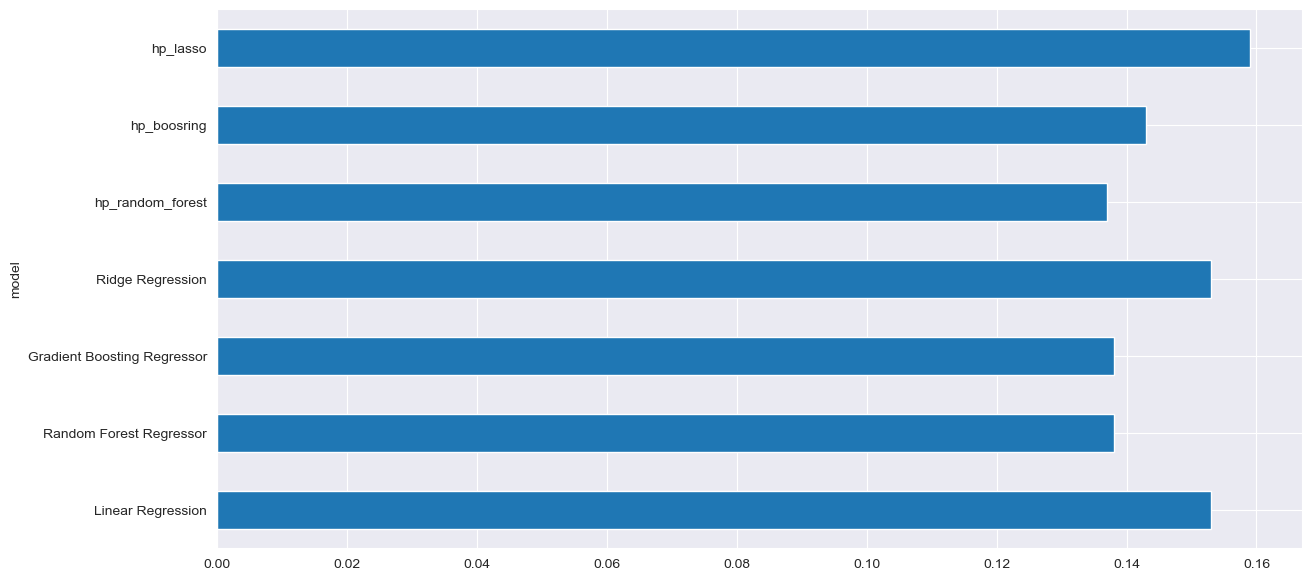

In [122]:
inf_.general_plot('mae_test')

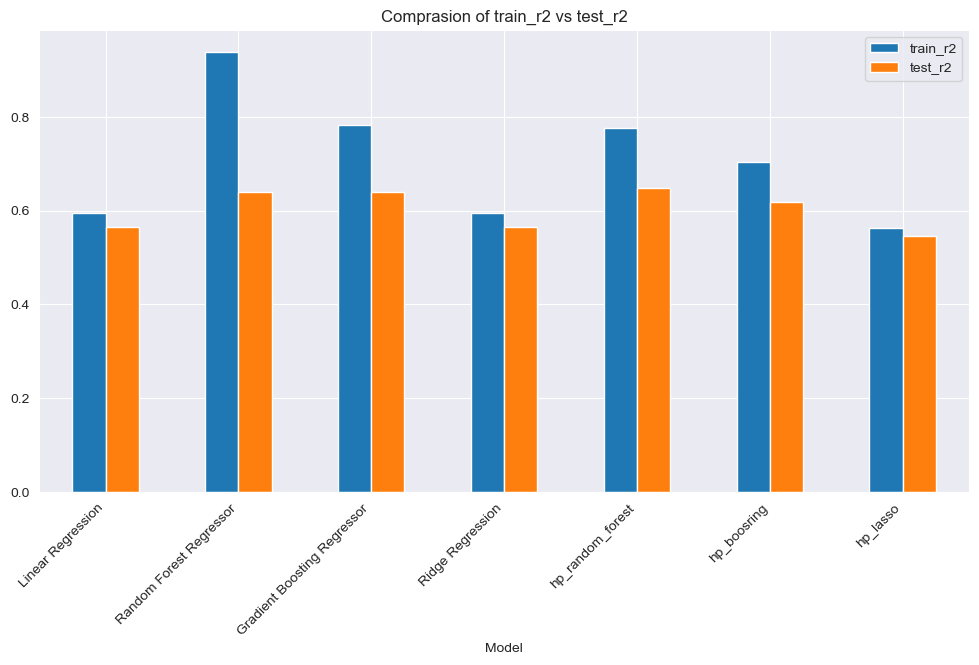

In [123]:
inf_.sort_plot('train_r2','test_r2')

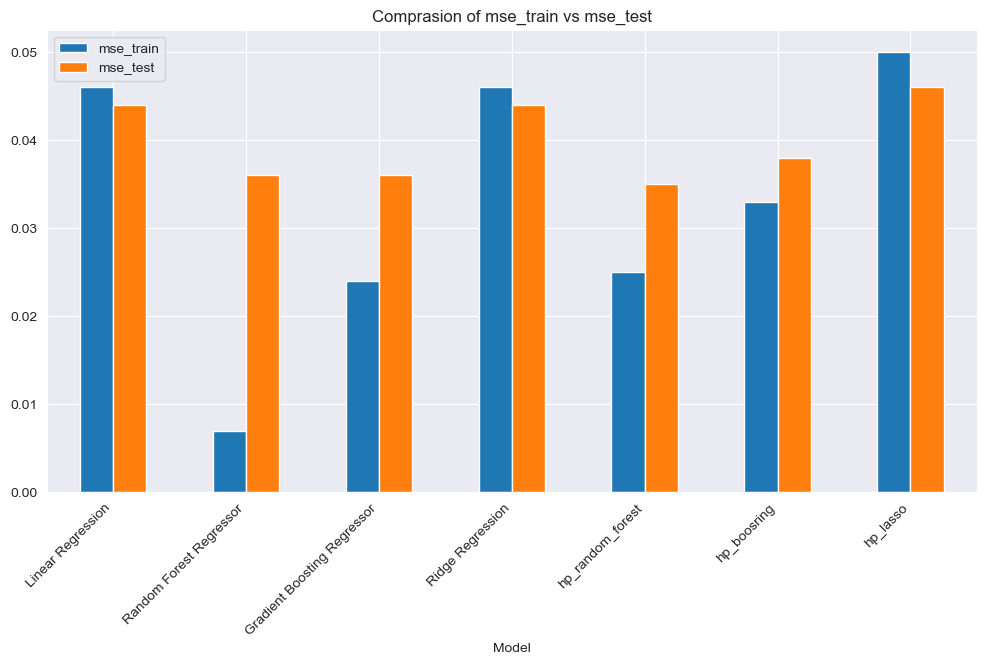

In [124]:
inf_.sort_plot('mse_train','mse_test')

In [125]:
inf_.plotyy('train_r2','test_r2')

In [126]:
inf_.plotyy('mse_train','mse_test')

## Inference of features and its impact in the model functionality

- Linear regression model is giving more weights to the following features [Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera] which confirms our inital feature selections of top 5 features

- Randomforest model is matching out 3 features with low weightage to the RAM

- Gradient boosting consider all the 5 features as its top 5 important feature but the weighting is not consistent and having large bias

- ridge,lasso and hyper parameter tuned models are reflecting the same 4 features as the greatest importance and their by providing decent prediction 



============================ end =====================================